<a href="https://colab.research.google.com/github/TheSarcasticOne69/Ml-projects/blob/main/Practical_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**8.Write a program to implement the naive bayes classifier for a sample training data set stored as a .csv file. Compute the accuracy of the classifier**

Accuracy on test data: 80.00%

Confusion Matrix:
[[3 1]
 [1 5]]

Classification Report:
              precision    recall  f1-score   support

          No       0.75      0.75      0.75         4
         Yes       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



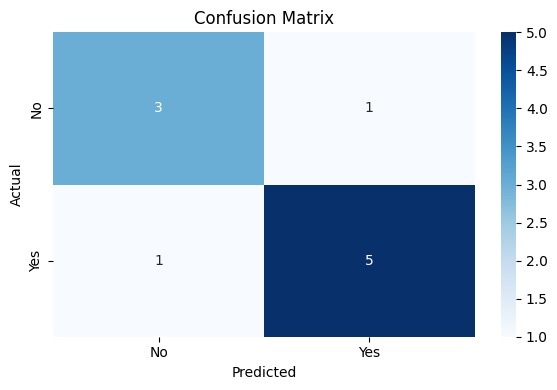

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data8.csv')

# Separate features and target
X = df.drop('Play', axis=1)
y = df['Play']

# Encode features and target
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Initialize and train the Naive Bayes classifier
model = CategoricalNB()
model.fit(X_train, y_train)

# Predict and compute accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
